# CPE 490 590
# DBSCAN in Python: Demonstration using Iris Dataset
## Author: Rahul Bhadani

## Read the dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Load the data
datadir = '/home/infinitive/VersionControl/cpe490590_ml_sp24/Dataset/Iris/'
datafile = 'iris.data'
data_df = pd.read_csv(datadir + datafile, index_col=0)
true_label = data_df[['Class']]
# Drop rows with missing values
data_df.dropna(axis=0, how='any', inplace=True)
data_df.drop(columns='Class', inplace=True)
data_df

,SepalWidth,PetalLength,PetalWidth
SepalLength,,,
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
...,...,...,...
6.7,3.0,5.2,2.3
6.3,2.5,5.0,1.9
6.5,3.0,5.2,2.0


## We will use PCA to reduce number of features. Note that this step is not necessary and here it is only for demonstration purposes
## We choose number of components that captures at least 95% of variance

In [2]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(data_df)

from sklearn.decomposition import PCA


# Create a PCA object
pca = PCA()

# Fit the PCA model to your data
pca.fit(X)

# Calculate cumulative sum of the explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components for 99% variance
num_components = np.where(cumulative_variance >= 0.99)[0][0] + 1

print(f"Number of components for 99% variance: {num_components}")

# Transform the data to the first num_components principal components
X_reduced = pca.transform(X)[:, :num_components]

Number of components for 99% variance: 3


# Apply DBSCAN. You need to adjust parameters for DBSCAN

In [3]:


# Apply DBSCAN
eps = 0.45  # Adjust this value based on your data
min_samples = 3  # Adjust as needed
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X_reduced)

# Print unique labels. -1 means some datapoints were classified as noise
np.unique(labels)



array([-1,  0,  1,  2])

In [4]:
count = np.count_nonzero(labels == -1)

print(f"The number of -1s (data points classified as noise) in the labels: {count}")

The number of -1s (data points classified as noise) in the labels: 10


# Calculate Silhoutte Score


In [5]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
score = silhouette_score(X, labels)

print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.239


# Visualize true and predicted labels.
# Note that true labels won't be available for most unsupervised learning. Iris Dataset has true labels that's why we could compare true and predicted labels

/tmp/ipykernel_11872/4221814591.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=true_label_color_list, cmap='viridis', label='True Labels')


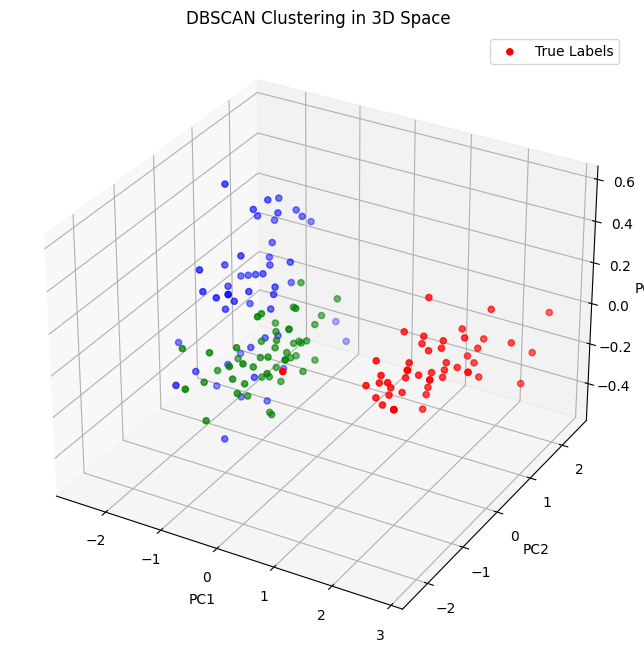

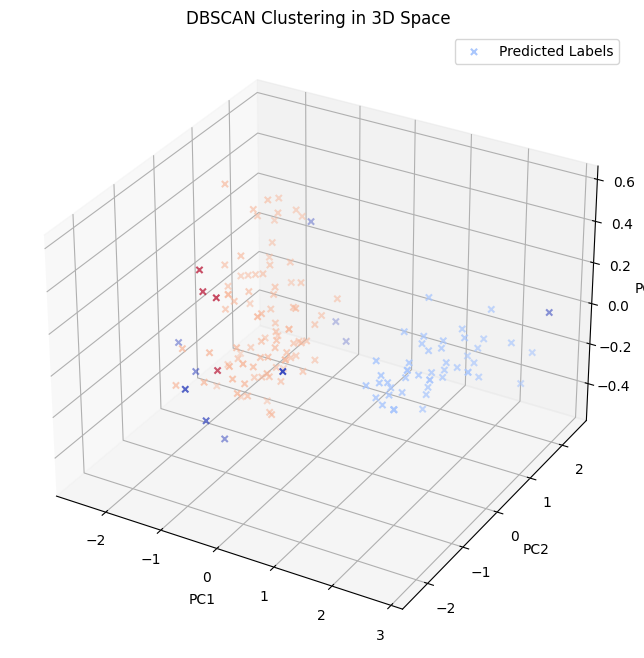

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot true labels
true_label_colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
true_label_color_list = [true_label_colors[label] for label in true_label['Class']]

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=true_label_color_list, cmap='viridis', label='True Labels')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('DBSCAN Clustering in 3D Space')
ax.legend()

plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot predicted labels
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels, cmap='coolwarm', marker='x', label='Predicted Labels')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('DBSCAN Clustering in 3D Space')
ax.legend()

plt.show()
